In [1]:
import numpy as np
import pandas as pd
import os
file_path = '\\data\\data\\'

---

OHLCV 데이터를 가져와서, 이것만 가지고 찾아볼 게 있는지 돌려보자.

In [2]:
ohlcv_data = pd.read_csv(os.getcwd() + file_path + 'HOURLY_MARKET-DATA_PRICE-OHLCV_ALL_EXCHANGE_SPOT_BTC_USD.csv')
ohlcv_data.head()

,datetime,close,volume
0,2023-01-01 00:00:00,16536.747967,5516.420322
1,2023-01-01 01:00:00,16557.136536,4513.341881
2,2023-01-01 02:00:00,16548.149805,4310.904314
3,2023-01-01 03:00:00,16533.632875,4893.417864
4,2023-01-01 04:00:00,16524.712159,5209.002297


In [6]:
ohlcv_data.count()

datetime    8760
close       8760
volume      8760
dtype: int64

## 가격변동 살펴보기

Text(0, 0.5, 'Average Daily closed value')

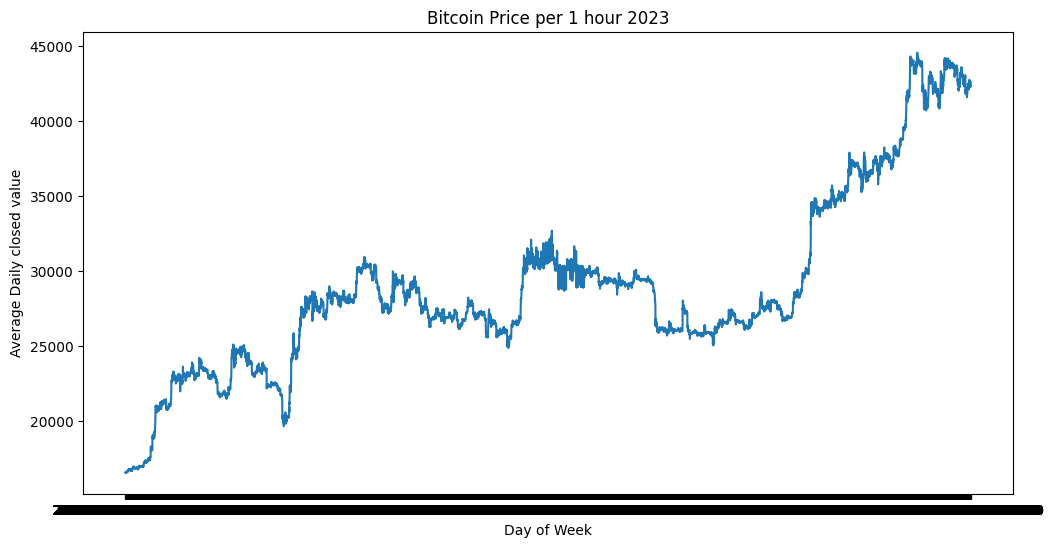

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(x='datetime', y='close', data=ohlcv_data)
plt.title('Bitcoin Price per 1 hour 2023')
plt.xlabel('Day of Week')
plt.ylabel('Average Daily closed value')

## 계절성(요일) 살펴보기

   day_of_week         volume    day_name
0            0  134150.181249      Montag
1            1  133808.530476    Dienstag
2            2  141468.183694    Mittwoch
3            3  137775.691042  Donnerstag
4            4  142510.704760     Freitag
5            5   79634.723624     Samstag
6            6   82955.650341     Sonntag


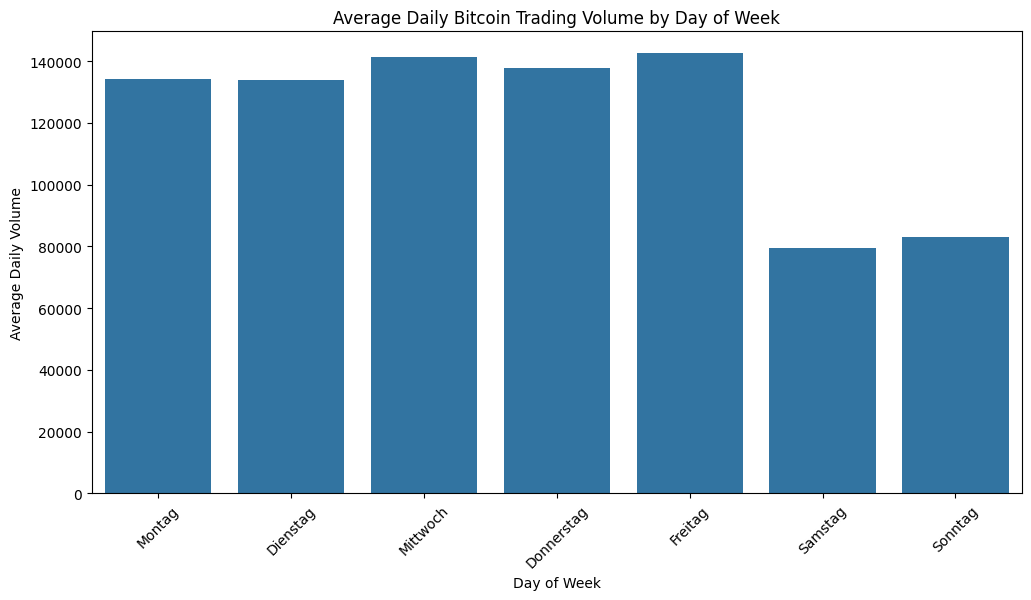

In [24]:
ohlcv_data['datetime'] = pd.to_datetime(ohlcv_data['datetime'])
ohlcv_data['date'] = ohlcv_data['datetime'].dt.date
daily_volume = ohlcv_data.groupby('date')['volume'].sum().reset_index()

daily_volume['day_of_week'] = pd.to_datetime(daily_volume['date']).dt.dayofweek

volume_by_day = daily_volume.groupby('day_of_week')['volume'].mean().reset_index()

day_names = {0: 'Montag', 1: 'Dienstag', 2: 'Mittwoch', 3: 'Donnerstag',
             4: 'Freitag', 5: 'Samstag', 6: 'Sonntag'}
volume_by_day['day_name'] = volume_by_day['day_of_week'].map(day_names)

print(volume_by_day)

plt.figure(figsize=(12, 6))
sns.barplot(x='day_name', y='volume', data=volume_by_day, order=[day_names[i] for i in range(7)])
plt.title('Average Daily Bitcoin Trading Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Daily Volume')
plt.xticks(rotation=45)
plt.show()

## 계절성(시간, 월)

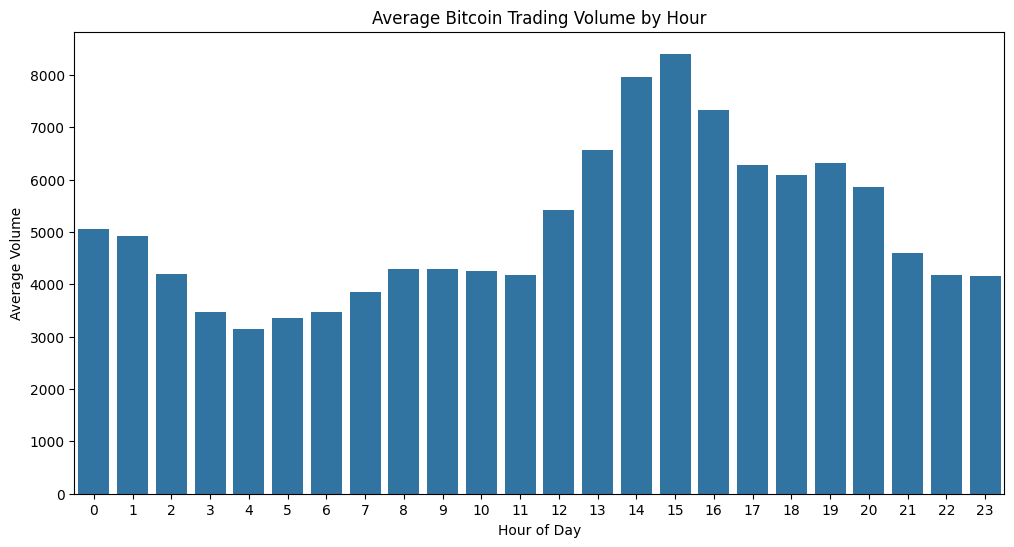

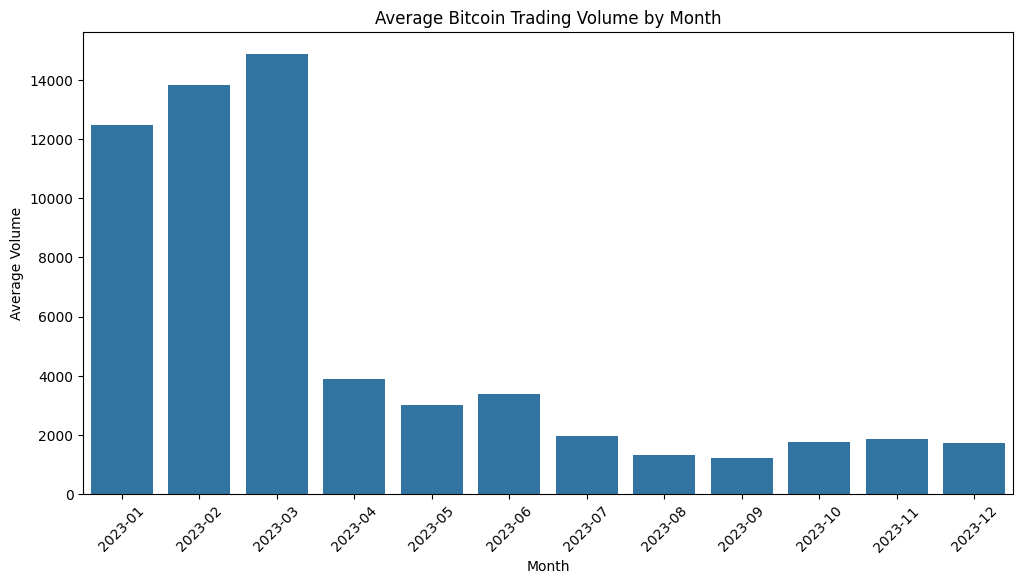

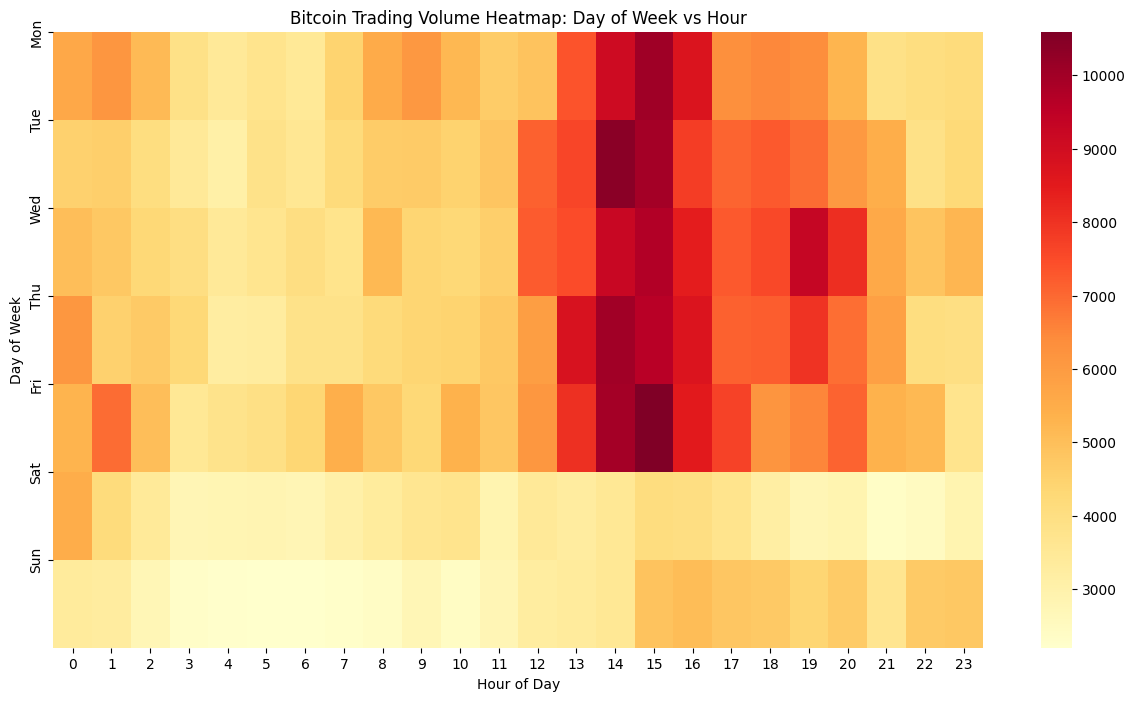

시간대별 평균 거래량:
    hour       volume
0      0  5059.004642
1      1  4914.870661
2      2  4194.549444
3      3  3471.398121
4      4  3156.480381
5      5  3355.743264
6      6  3468.262205
7      7  3853.704514
8      8  4287.546131
9      9  4301.894265
10    10  4264.094411
11    11  4179.583553
12    12  5427.285121
13    13  6561.315626
14    14  7962.878540
15    15  8406.119458
16    16  7323.623807
17    17  6286.183101
18    18  6088.002543
19    19  6317.236560
20    20  5853.392085
21    21  4591.846037
22    22  4175.887335
23    23  4150.457758

월별 평균 거래량:
      month        volume
0   2023-01  12466.976647
1   2023-02  13846.166630
2   2023-03  14877.376386
3   2023-04   3905.803975
4   2023-05   3018.745826
5   2023-06   3372.494747
6   2023-07   1956.589325
7   2023-08   1319.251493
8   2023-09   1230.584640
9   2023-10   1769.710176
10  2023-11   1857.622462
11  2023-12   1734.143253


In [25]:
# datetime 열을 datetime 타입으로 변환
ohlcv_data['datetime'] = pd.to_datetime(ohlcv_data['datetime'])

# 시간대별 분석
ohlcv_data['hour'] = ohlcv_data['datetime'].dt.hour
hourly_volume = ohlcv_data.groupby('hour')['volume'].mean().reset_index()

# 월별 분석
ohlcv_data['month'] = ohlcv_data['datetime'].dt.to_period('M')
monthly_volume = ohlcv_data.groupby('month')['volume'].mean().reset_index()
monthly_volume['month'] = monthly_volume['month'].astype(str)

# 시각화: 시간대별 평균 거래량
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='volume', data=hourly_volume)
plt.title('Average Bitcoin Trading Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Volume')
plt.xticks(rotation=0)
plt.show()

# 시각화: 월별 평균 거래량
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='volume', data=monthly_volume)
plt.title('Average Bitcoin Trading Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)
plt.show()

# 추가 분석: 요일별 시간대 히트맵
ohlcv_data['day_of_week'] = ohlcv_data['datetime'].dt.dayofweek
heatmap_data = ohlcv_data.pivot_table(values='volume', index='day_of_week', columns='hour', aggfunc='mean')

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False)
plt.title('Bitcoin Trading Volume Heatmap: Day of Week vs Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# 결과 출력
print("시간대별 평균 거래량:")
print(hourly_volume)
print("\n월별 평균 거래량:")
print(monthly_volume)

## 가격과 volume 사이의 상관관계 분석

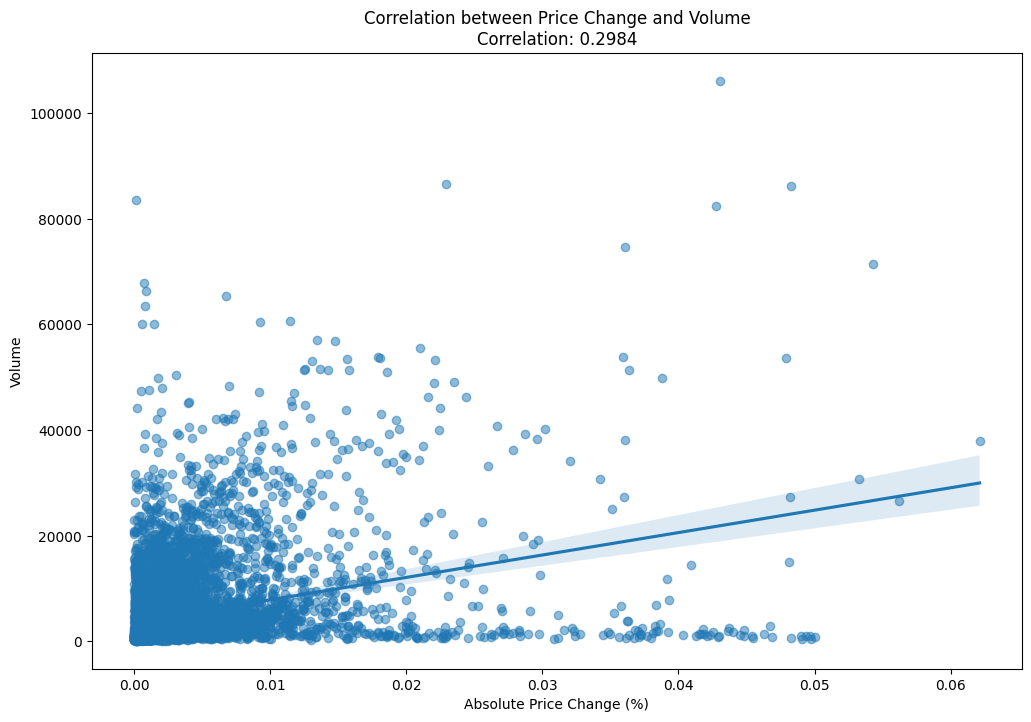

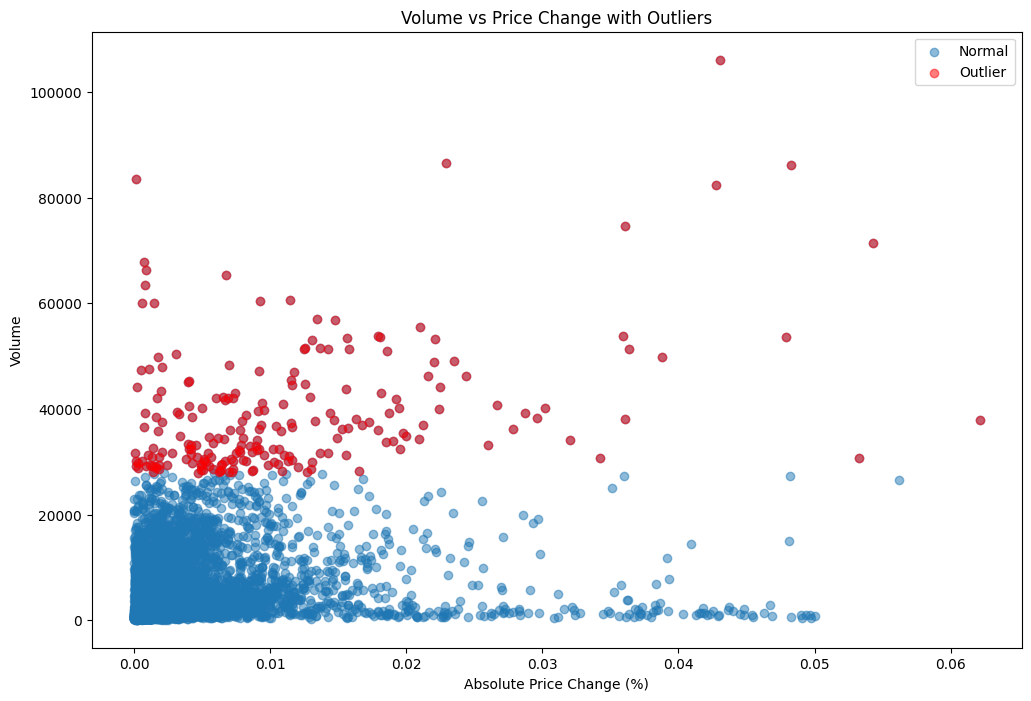

Top 10 Outliers:
                datetime         close         volume  price_change
1740 2023-03-14 12:00:00  25711.610404  106106.465006      0.043027
1719 2023-03-13 15:00:00  23917.887405   86618.830679      0.022881
312  2023-01-14 00:00:00  20896.134259   86090.872063      0.048267
1741 2023-03-14 13:00:00  25714.482369   83584.082714      0.000112
1718 2023-03-13 14:00:00  23382.854955   82384.841343      0.042791
1628 2023-03-09 20:00:00  20105.285451   74701.878465     -0.036042
1465 2023-03-03 01:00:00  22140.823304   71411.465457     -0.054277
1575 2023-03-07 15:00:00  22323.742707   67774.199352      0.000701
277  2023-01-12 13:00:00  18290.789382   66242.111019      0.000887
1120 2023-02-16 16:00:00  24908.237373   65273.778390     -0.006737


C:\Users\findu\AppData\Local\Temp\ipykernel_4148\761240587.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_data['month'] = outlier_data['datetime'].dt.to_period('M')


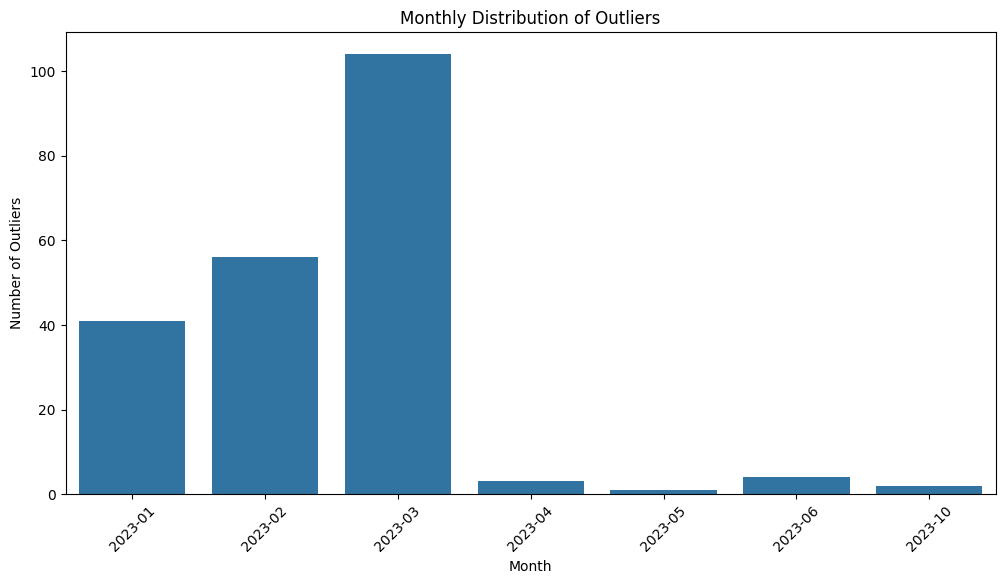

In [27]:
from scipy import stats

# 가격 변동 계산
ohlcv_data['price_change'] = ohlcv_data['close'].pct_change()
ohlcv_data['price_change_abs'] = abs(ohlcv_data['price_change'])

# 상관관계 분석
correlation = ohlcv_data['volume'].corr(ohlcv_data['price_change_abs'])

# 산점도 및 회귀선
plt.figure(figsize=(12, 8))
sns.regplot(x='price_change_abs', y='volume', data=ohlcv_data, scatter_kws={'alpha':0.5})
plt.title(f'Correlation between Price Change and Volume\nCorrelation: {correlation:.4f}')
plt.xlabel('Absolute Price Change (%)')
plt.ylabel('Volume')
plt.show()

# 이상치 분석 (Z-score 방법)
z_scores = np.abs(stats.zscore(ohlcv_data[['volume', 'price_change_abs']]))
outliers = (z_scores > 3).any(axis=1)
outlier_data = ohlcv_data[outliers]

# 이상치 시각화
plt.figure(figsize=(12, 8))
plt.scatter(ohlcv_data['price_change_abs'], ohlcv_data['volume'], alpha=0.5, label='Normal')
plt.scatter(outlier_data['price_change_abs'], outlier_data['volume'], color='red', alpha=0.5, label='Outlier')
plt.title('Volume vs Price Change with Outliers')
plt.xlabel('Absolute Price Change (%)')
plt.ylabel('Volume')
plt.legend()
plt.show()

# 상위 10개 이상치 출력
print("Top 10 Outliers:")
print(outlier_data.sort_values('volume', ascending=False)[['datetime', 'close', 'volume', 'price_change']].head(10))

# 월별 이상치 분포
outlier_data['month'] = outlier_data['datetime'].dt.to_period('M')
monthly_outliers = outlier_data.groupby('month').size().reset_index(name='outlier_count')
monthly_outliers['month'] = monthly_outliers['month'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='outlier_count', data=monthly_outliers)
plt.title('Monthly Distribution of Outliers')
plt.xlabel('Month')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.show()

## 이상치를 더 파고들면 다음과 같다.

C:\Users\findu\AppData\Local\Temp\ipykernel_4148\1775817038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['days_from_outlier'] = (period_data['datetime'] - outlier_date).dt.total_seconds() / (24 * 60 * 60)
C:\Users\findu\AppData\Local\Temp\ipykernel_4148\1775817038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['days_from_outlier'] = (period_data['datetime'] - outlier_date).dt.total_seconds() / (24 * 60 * 60)
C:\Users\findu\AppData\Local\Temp\ipykernel_4148\1775817038.py:7

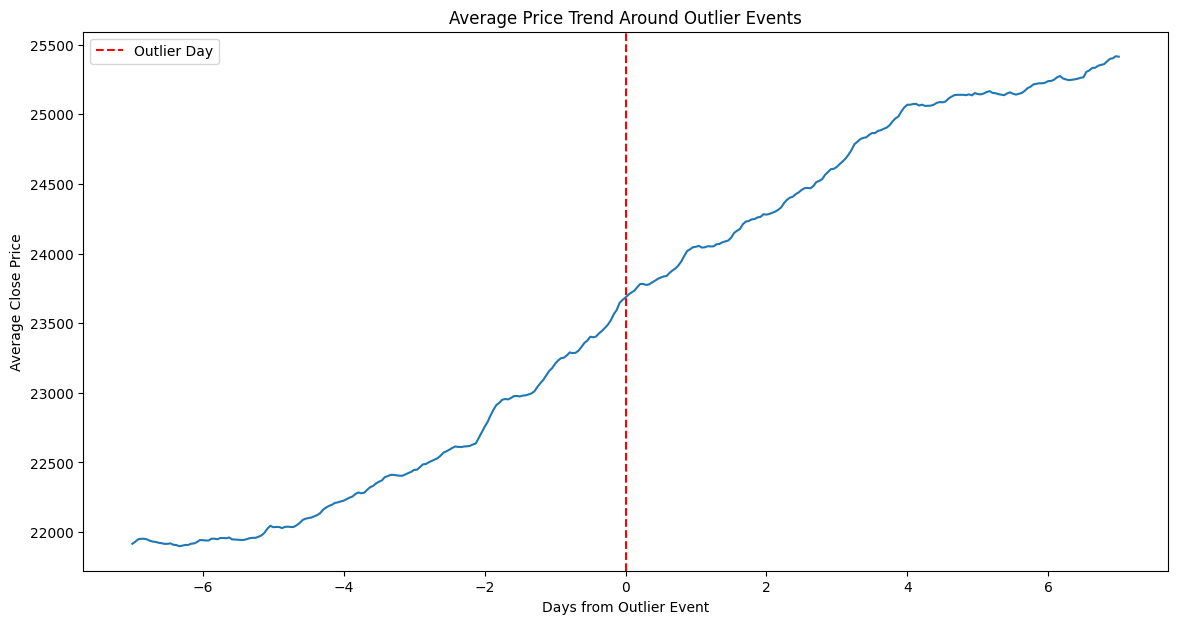

Average price change from 7 days before to 7 days after outlier events: 15.95%


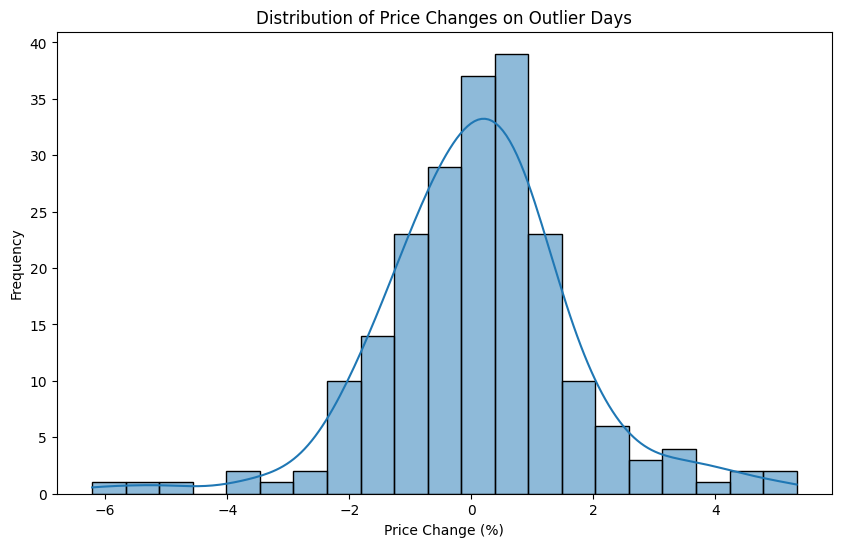

Average price change on outlier days: 0.10%
Median price change on outlier days: 0.08%


In [29]:
# 이상치 발생 전후 7일간의 가격 변동 분석 함수
def analyze_price_trend(data, outlier_date, window=7):
    start_date = outlier_date - pd.Timedelta(days=window)
    end_date = outlier_date + pd.Timedelta(days=window)
    
    period_data = data[(data['datetime'] >= start_date) & (data['datetime'] <= end_date)]
    period_data['days_from_outlier'] = (period_data['datetime'] - outlier_date).dt.total_seconds() / (24 * 60 * 60)
    
    return period_data

# 모든 이상치에 대해 분석 수행
all_trends = []
for outlier_date in outlier_data['datetime']:
    trend = analyze_price_trend(ohlcv_data, outlier_date)
    all_trends.append(trend)

combined_trends = pd.concat(all_trends)

# 평균 가격 변동 계산
average_trend = combined_trends.groupby('days_from_outlier')['close'].mean().reset_index()

# 시각화
plt.figure(figsize=(14, 7))
sns.lineplot(x='days_from_outlier', y='close', data=average_trend)
plt.axvline(x=0, color='r', linestyle='--', label='Outlier Day')
plt.title('Average Price Trend Around Outlier Events')
plt.xlabel('Days from Outlier Event')
plt.ylabel('Average Close Price')
plt.legend()
plt.show()

# 이상치 전후 가격 변동률 계산
pre_outlier_price = average_trend[average_trend['days_from_outlier'] == -7]['close'].values[0]
post_outlier_price = average_trend[average_trend['days_from_outlier'] == 7]['close'].values[0]
price_change_percentage = ((post_outlier_price - pre_outlier_price) / pre_outlier_price) * 100

print(f"Average price change from 7 days before to 7 days after outlier events: {price_change_percentage:.2f}%")

# 이상치 당일 가격 변동 분포
outlier_day_changes = outlier_data['price_change'] * 100  # Convert to percentage

plt.figure(figsize=(10, 6))
sns.histplot(outlier_day_changes, kde=True)
plt.title('Distribution of Price Changes on Outlier Days')
plt.xlabel('Price Change (%)')
plt.ylabel('Frequency')
plt.show()

print(f"Average price change on outlier days: {outlier_day_changes.mean():.2f}%")
print(f"Median price change on outlier days: {outlier_day_changes.median():.2f}%")

C:\Users\findu\AppData\Local\Temp\ipykernel_4148\391403059.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['price_change'] = period_data['close'].pct_change()


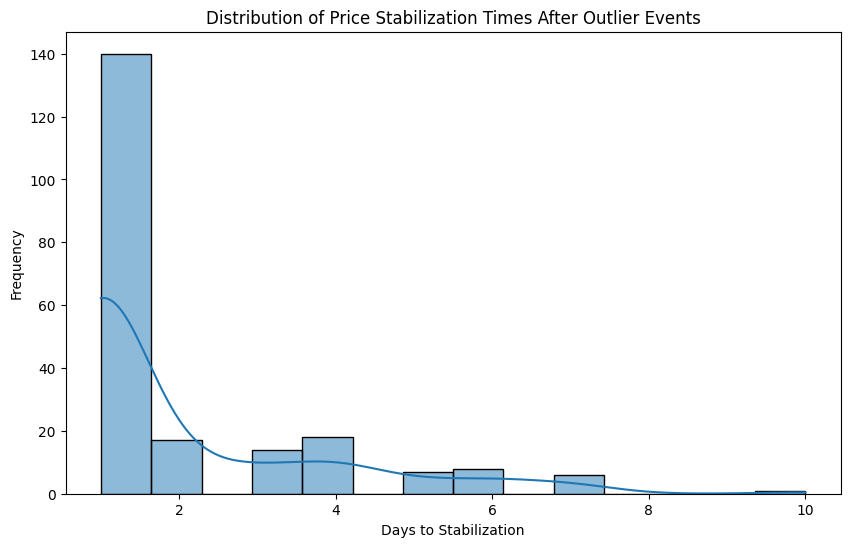

Average time to price stabilization: 2.00 days
Median time to price stabilization: 1.00 days

Outlier Event Type Statistics:
       event_type price_change                            volume  \
                          mean    median       std          mean   
0           Crash    -0.014336 -0.011493  0.012317  49074.808309   
1  Price Decrease    -0.010094 -0.007213  0.010107  32461.549489   
2  Price Increase     0.009557  0.007928  0.008747  32521.255260   
3           Surge     0.015328  0.012526  0.013419  54188.686591   

                               
         median           std  
0  47273.722698   8944.455075  
1  31640.369241   3400.922339  
2  31811.725179   3341.823169  
3  51315.023376  15231.222560  


C:\Users\findu\AppData\Local\Temp\ipykernel_4148\391403059.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_data['event_type'] = outlier_data.apply(classify_outlier, axis=1)


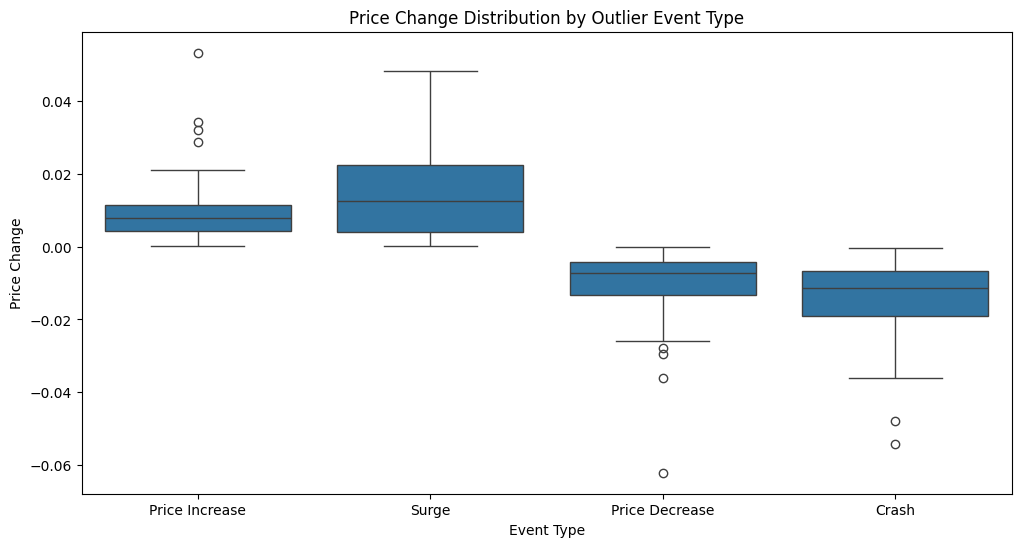

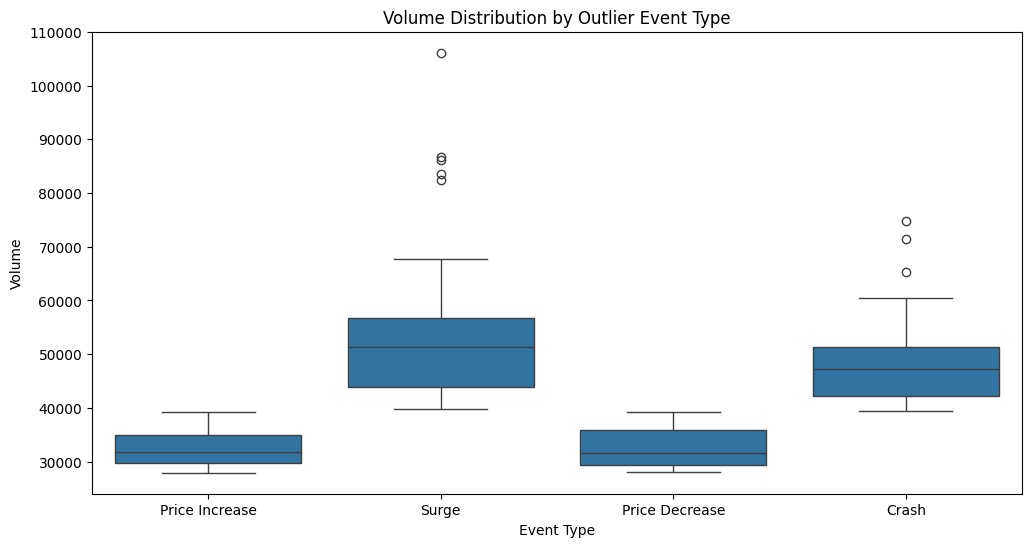

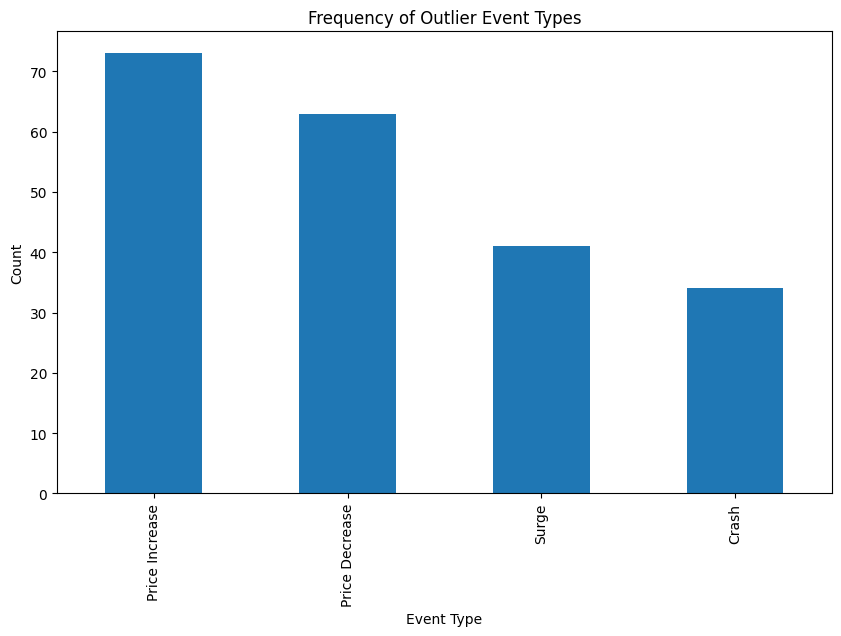


Outlier Event Type Frequencies:
event_type
Price Increase    73
Price Decrease    63
Surge             41
Crash             34
Name: count, dtype: int64


In [31]:
# 1. 이상치 이벤트 후 가격 안정화 시간 분석
def analyze_price_stabilization(data, outlier_date, window=30, threshold=0.01):
    start_date = outlier_date
    end_date = outlier_date + pd.Timedelta(days=window)
    
    period_data = data[(data['datetime'] > start_date) & (data['datetime'] <= end_date)]
    period_data['price_change'] = period_data['close'].pct_change()
    
    # 연속 3일 동안 가격 변동이 threshold 이하인 첫 번째 날 찾기
    for i in range(len(period_data) - 2):
        if all(abs(period_data['price_change'].iloc[i:i+3]) < threshold):
            return i
    
    return window  # 안정화되지 않은 경우 최대 window 반환

stabilization_times = []
for outlier_date in outlier_data['datetime']:
    time = analyze_price_stabilization(ohlcv_data, outlier_date)
    stabilization_times.append(time)

# 안정화 시간 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(stabilization_times, kde=True)
plt.title('Distribution of Price Stabilization Times After Outlier Events')
plt.xlabel('Days to Stabilization')
plt.ylabel('Frequency')
plt.show()

print(f"Average time to price stabilization: {np.mean(stabilization_times):.2f} days")
print(f"Median time to price stabilization: {np.median(stabilization_times):.2f} days")

# 평균 거래량 계산
mean_volume = outlier_data['volume'].mean()

# 2. 이상치 이벤트 유형 분류 및 특성 분석
def classify_outlier(row):
    if row['price_change'] > 0:
        return 'Surge' if row['volume'] > mean_volume else 'Price Increase'
    else:
        return 'Crash' if row['volume'] > mean_volume else 'Price Decrease'

outlier_data['event_type'] = outlier_data.apply(classify_outlier, axis=1)

# 유형별 특성 분석
event_type_stats = outlier_data.groupby('event_type').agg({
    'price_change': ['mean', 'median', 'std'],
    'volume': ['mean', 'median', 'std']
}).reset_index()

print("\nOutlier Event Type Statistics:")
print(event_type_stats)

# 유형별 가격 변동 분포 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='event_type', y='price_change', data=outlier_data)
plt.title('Price Change Distribution by Outlier Event Type')
plt.xlabel('Event Type')
plt.ylabel('Price Change')
plt.show()

# 유형별 거래량 분포 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='event_type', y='volume', data=outlier_data)
plt.title('Volume Distribution by Outlier Event Type')
plt.xlabel('Event Type')
plt.ylabel('Volume')
plt.show()

# 유형별 발생 빈도
event_type_counts = outlier_data['event_type'].value_counts()
plt.figure(figsize=(10, 6))
event_type_counts.plot(kind='bar')
plt.title('Frequency of Outlier Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

print("\nOutlier Event Type Frequencies:")
print(event_type_counts)

## 이제, 변수들 중 가격에 영향 줄만한 것들을 추려서 공분산 계산해봄.

In [12]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 파일 경로 설정
base_path = os.getcwd() + '\\data\\data\\'

# 필요한 파일 목록 (예시, 실제 분석에 필요한 파일들로 수정 필요)
files_to_load = [
    'HOURLY_MARKET-DATA_PRICE-OHLCV_ALL_EXCHANGE_SPOT_BTC_USD.csv',
    'HOURLY_MARKET-DATA_OPEN-INTEREST_ALL_EXCHANGE.csv',
    'HOURLY_MARKET-DATA_TAKER-BUY-SELL-STATS_ALL_EXCHANGE.csv',
    'HOURLY_NETWORK-DATA_ADDRESSES-COUNT.csv',
    'HOURLY_NETWORK-DATA_HASHRATE.csv',
    'HOURLY_NETWORK-DATA_TRANSACTIONS-COUNT.csv'
]

# 데이터 로드 및 병합
merged_df = pd.DataFrame()
for file in files_to_load:
    df = pd.read_csv(base_path + file)
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    # 파일명에서 주요 특성 추출 (예: PRICE-OHLCV, OPEN-INTEREST 등)
    feature = file.split('_')[2]
    
    # datetime으로 그룹화하고 평균 계산
    df = df.groupby('datetime').mean()
    
    # 열 이름에 파일 특성 추가
    df = df.add_prefix(f'{feature}_')
    
    # 병합
    if merged_df.empty:
        merged_df = df
    else:
        merged_df = merged_df.join(df, how='outer')

# 결측치 처리 (예: 전진 채우기)
merged_df.fillna(method='ffill', inplace=True)

# 모든 숫자형 열에 대해 상관관계 계산
correlation_matrix = merged_df.select_dtypes(include=[np.number]).corr()

# 히트맵 생성
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of All Numerical Variables')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

# 종가(PRICE-OHLCV의 close)와의 상관관계 추출 및 정렬
close_column = [col for col in merged_df.columns if 'PRICE-OHLCV' in col and 'close' in col]
if close_column:
    close_correlation = correlation_matrix[close_column[0]].sort_values(ascending=False)

    print("Top 10 variables most correlated with closing price:")
    print(close_correlation.head(10))

    print("\nBottom 10 variables least correlated with closing price:")
    print(close_correlation.tail(10))
else:
    print("Close price column not found in the data.")

# 상관관계가 높은 변수쌍 출력
high_correlation = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_correlation = high_correlation.stack().reset_index()
high_correlation.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_correlation = high_correlation.sort_values('Correlation', ascending=False)

print("\nTop 10 highly correlated variable pairs:")
print(high_correlation.head(10))

C:\Users\findu\AppData\Local\Temp\ipykernel_21692\2970801668.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


Top 10 variables most correlated with closing price:
PRICE-OHLCV_close                                  1.000000
HASHRATE.csv_hashrate                              0.468012
TRANSACTIONS-COUNT.csv_transactions_count_mean     0.311724
TRANSACTIONS-COUNT.csv_transactions_count_total    0.186923
TAKER-BUY-SELL-STATS_taker_sell_volume             0.173775
TAKER-BUY-SELL-STATS_taker_buy_volume              0.171844
ADDRESSES-COUNT.csv_addresses_count_sender         0.094795
TAKER-BUY-SELL-STATS_taker_sell_ratio              0.018748
TAKER-BUY-SELL-STATS_taker_buy_ratio              -0.018748
TAKER-BUY-SELL-STATS_taker_buy_sell_ratio         -0.022713
Name: PRICE-OHLCV_close, dtype: float64

Bottom 10 variables least correlated with closing price:
TAKER-BUY-SELL-STATS_taker_sell_volume          0.173775
TAKER-BUY-SELL-STATS_taker_buy_volume           0.171844
ADDRESSES-COUNT.csv_addresses_count_sender      0.094795
TAKER-BUY-SELL-STATS_taker_sell_ratio           0.018748
TAKER-BUY-SELL-STATS_